In [1]:
import copy
import re
import csv
from random import shuffle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from nltk.corpus import floresta as flt
# from nltk.corpus import mac_morpho as mcm

from utils import load_six_emotions, load_3_emotions, generate_corpus
from unsupervised.emotional_lsa import EmotionalLSA

np.random.seed(12345)

%matplotlib inline

In [2]:
# Create a function called "chunks" with two arguments, l and n:
def chunks(l, n):
    # For item i in a range that is a length of l,
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield l[i:i+n]
        

print('Loading emotional words: ')
emotion_words = load_six_emotions('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/emocoes')
emotion_words_n = load_3_emotions('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/emocoes')

emotion_words['NEUTRO'] = emotion_words_n['NEUTRO']
emotion_words_n['POSITIVO'] += emotion_words['ALEGRIA']
emotion_words_n['POSITIVO'] += emotion_words['SURPRESA']
emotion_words_n['NEGATIVO'] += emotion_words['MEDO']
emotion_words_n['NEGATIVO'] += emotion_words['RAIVA']
emotion_words_n['NEGATIVO'] += emotion_words['TRISTEZA']
emotion_words_n['NEGATIVO'] += emotion_words['DESGOSTO']

rep = [
    ('\n', '. '), ('"', ''), ('@', ''), 
    ('#', ''), ('RT', ''), (r'(http[s]*?:\/\/)+.*[\r\n]*', '')
]

Loading emotional words: 


## Validação 1

Validaremos o algoritmo, adicionando o em uma das 6 emoções definidas + 1 neutro.

Utilizaremos uma base com aproximadamente 3000 frases diversas.

In [3]:
# with open('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/frases.txt') as h:
with open('/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/frases.txt') as h:
    original_phrases = h.readlines()
original_phrases = original_phrases[:1500]
phrases = copy.deepcopy(original_phrases)
# phrases += [' '.join(f).replace('_', ' ') for f in flt.sents()[:2000]]
# phrases += [' '.join(f).replace('_', ' ') for f in mch.sents()[:2000]]
# phrases += [' '.join(f).replace('_', ' ') for f in mcm.sents()[:2000]]
phrases = generate_corpus(phrases)
ldocs = [f'D{i}' for i in range(len(original_phrases))]

In [4]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, emotion_words)

Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 3233
--- 0.030853748321533203 seconds ---
Calculating SVD...
--- 2.864912271499634 seconds ---
Processing emotional state... this may take a while...
--- 0.0010018348693847656 seconds ---
Generating emotional state from lexicon...
--- 10.583404541015625 seconds ---
Calculating final emotional matrix...
--- 1.3870713710784912 seconds ---


In [5]:
df = pd.DataFrame(predicted[:len(original_phrases)], index=ldocs, columns=emotion_words.keys())

D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

D1 - "A religiao é o que impede o pobre de matar o rico.

D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

D5 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

D6 - A adversidade desperta em nós capacidades que, em circunstâncias favoráveis, teriam ficado adormecidas.

D7 - A adversidade põe à prova os espíritos.



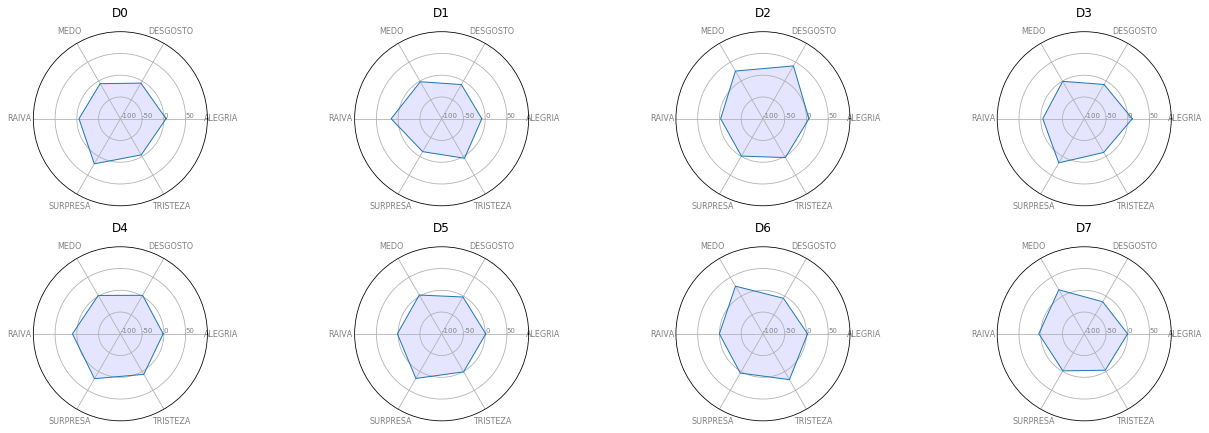

In [6]:
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18, 12))
for m in range(8):
    idx = m + 1
    
    values = df.loc[f'D{m}'].values
    values = np.append(values, values[0])
    print(f'D{m} - {original_phrases[m]}')
    # Initialise the spider plot
    ax = plt.subplot(4, 4, idx, polar=True)
    # Title
    plt.title(f'D{m}')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(range(-100, 100, 50), [f'{i}' for i in range(-100, 100, 50)], color="grey", size=7)
    plt.ylim(-100, 100)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.tight_layout()
plt.show()

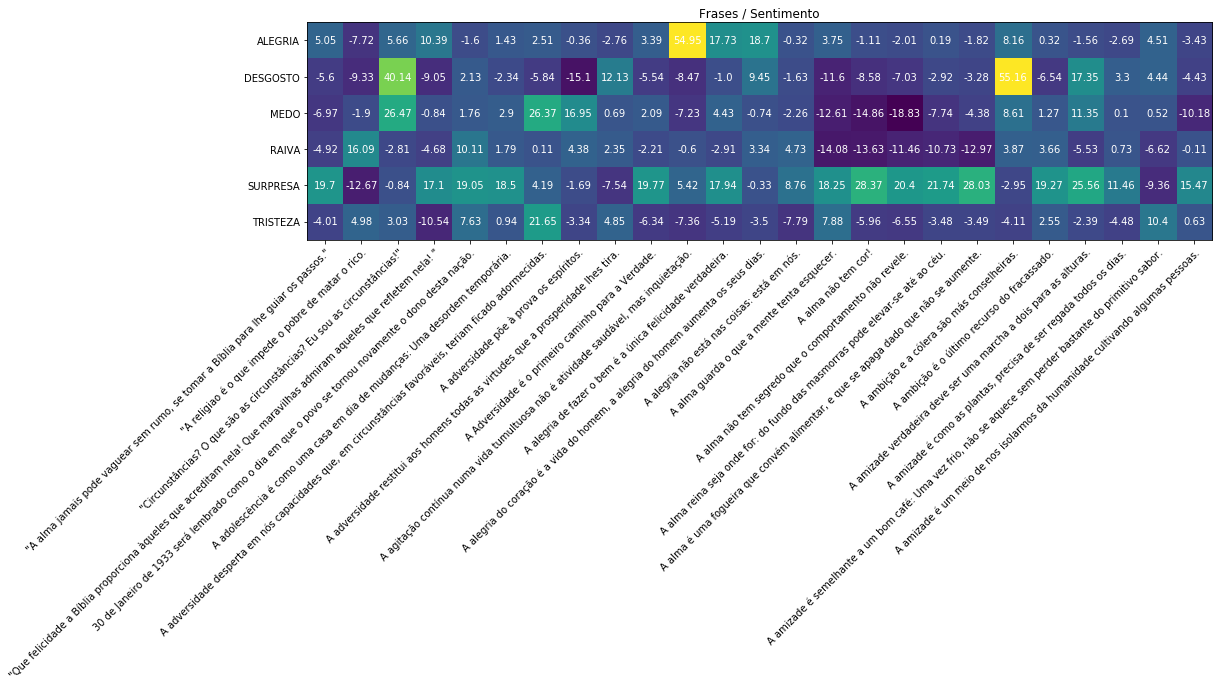

In [7]:
N = 25

categories = list(df)
k_phrases = original_phrases[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

In [8]:
for i, frase in enumerate(original_phrases[:10]):
    print('-' * 20)
    print(f'D{i} - {frase}')
    print(df.loc[f'D{i}'])

--------------------
D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

ALEGRIA      5.05
DESGOSTO    -5.60
MEDO        -6.97
RAIVA       -4.92
SURPRESA    19.70
TRISTEZA    -4.01
Name: D0, dtype: float64
--------------------
D1 - "A religiao é o que impede o pobre de matar o rico.

ALEGRIA     -7.72
DESGOSTO    -9.33
MEDO        -1.90
RAIVA       16.09
SURPRESA   -12.67
TRISTEZA     4.98
Name: D1, dtype: float64
--------------------
D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

ALEGRIA      5.66
DESGOSTO    40.14
MEDO        26.47
RAIVA       -2.81
SURPRESA    -0.84
TRISTEZA     3.03
Name: D2, dtype: float64
--------------------
D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

ALEGRIA     10.39
DESGOSTO    -9.05
MEDO        -0.84
RAIVA       -4.68
SURPRESA    17.10
TRISTEZA   -10.54
Name: D3, dtype: float64
--------------------
D4 - 30 de Jan

## Validação 2

Utilizaremos os mesmos dados, entretanto agora categorizaremos as frases acima, nas categorias POSITIVO, NEGATIVO e NEUTRO.

In [9]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(phrases, emotion_words_n)
    
size = len(original_phrases)
df = pd.DataFrame(predicted[:size], index=ldocs, columns=emotion_words_n.keys())

Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 3233
--- 0.036332130432128906 seconds ---
Calculating SVD...
--- 3.179001569747925 seconds ---
Processing emotional state... this may take a while...
--- 0.0009627342224121094 seconds ---
Generating emotional state from lexicon...
--- 14.454628229141235 seconds ---
Calculating final emotional matrix...
--- 0.5054605007171631 seconds ---


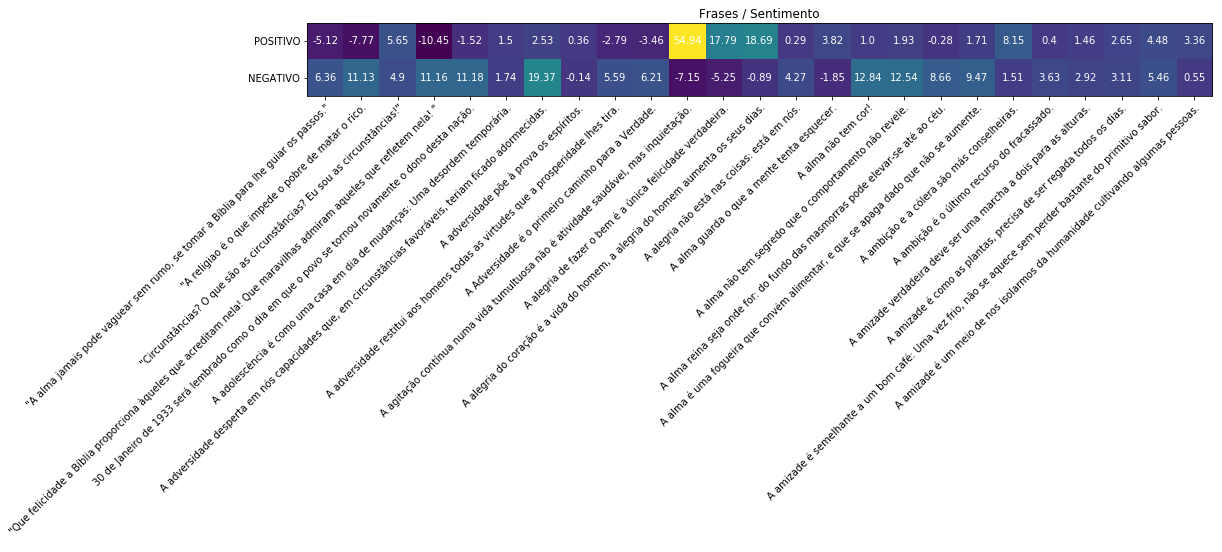

In [10]:
N = 25

categories = list(df)
k_phrases = original_phrases[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

D1 - "A religiao é o que impede o pobre de matar o rico.

D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

D5 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

D6 - A adversidade desperta em nós capacidades que, em circunstâncias favoráveis, teriam ficado adormecidas.

D7 - A adversidade põe à prova os espíritos.

D8 - A adversidade restitui aos homens todas as virtudes que a prosperidade lhes tira.

D9 - A Adversidade é o primeiro caminho para a Verdade.

D10 - A agitação contínua numa vida tumultuosa não é atividade saudável, mas inquietação.

D11 - A alegria de fazer o bem é a única felicidade verdadeira.

D12 -

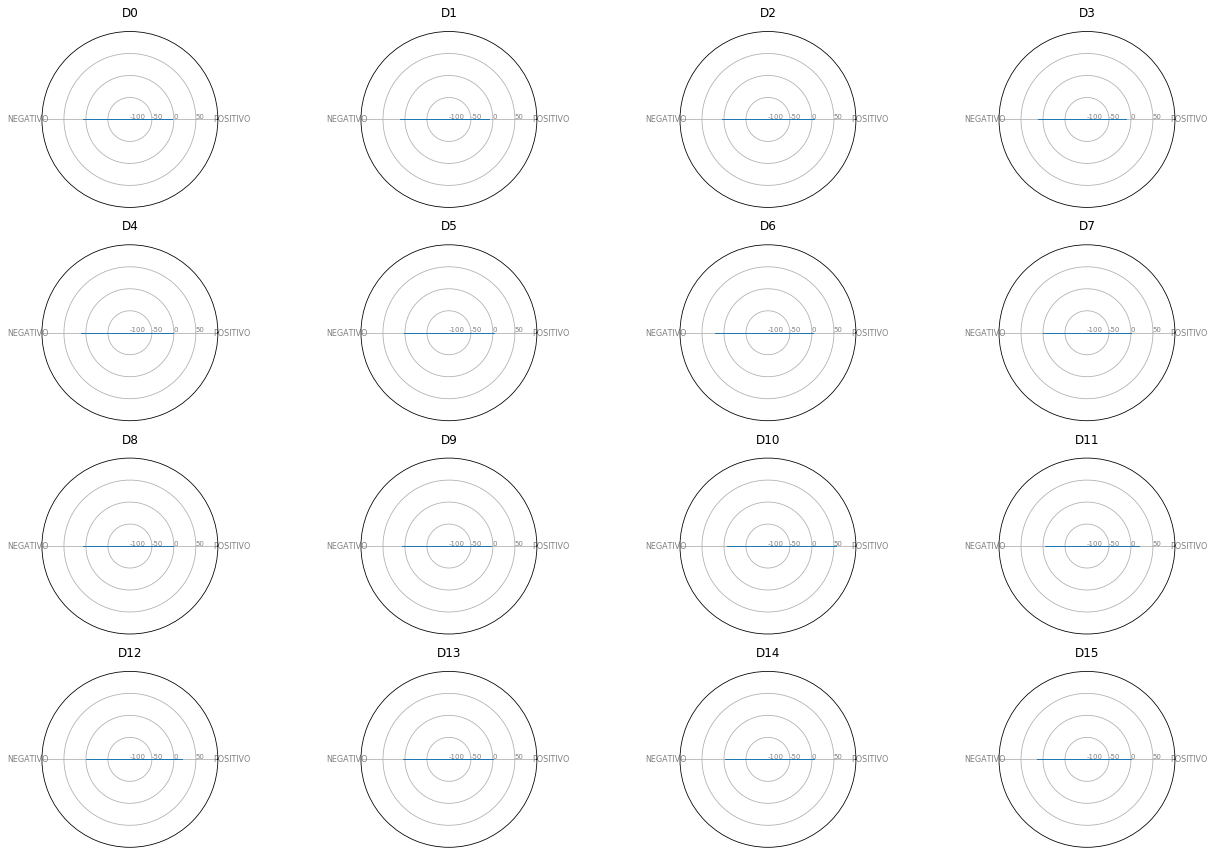

In [11]:
categories = list(df)
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(18, 12))
for m in range(16):
    idx = m + 1
    
    values = df.loc[f'D{m}'].values
    values = np.append(values, values[0])
    print(f'D{m} - {original_phrases[m]}')
    # Initialise the spider plot
    ax = plt.subplot(4, 4, idx, polar=True)
    # Title
    plt.title(f'D{m}')
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(range(-100, 100, 50), [f'{i}' for i in range(-100, 100, 50)], color="grey", size=7)
    plt.ylim(-100, 100)
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

plt.tight_layout()
plt.show()

In [12]:
for i, frase in enumerate(original_phrases[:25]):
    print('-' * 20)
    print(f'D{i} - {frase}')
    print(df.loc[f'D{i}'])

--------------------
D0 - "A alma jamais pode vaguear sem rumo, se tomar a Bíblia para lhe guiar os passos."

POSITIVO   -5.12
NEGATIVO    6.36
Name: D0, dtype: float64
--------------------
D1 - "A religiao é o que impede o pobre de matar o rico.

POSITIVO    -7.77
NEGATIVO    11.13
Name: D1, dtype: float64
--------------------
D2 - "Circunstâncias? O que são as circunstâncias? Eu sou as circunstâncias!"

POSITIVO    5.65
NEGATIVO    4.90
Name: D2, dtype: float64
--------------------
D3 - "Que felicidade a Bíblia proporciona àqueles que acreditam nela! Que maravilhas admiram aqueles que refletem nela! "

POSITIVO   -10.45
NEGATIVO    11.16
Name: D3, dtype: float64
--------------------
D4 - 30 de Janeiro de 1933 será lembrado como o dia em que o povo se tornou novamente o dono desta nação.

POSITIVO    -1.52
NEGATIVO    11.18
Name: D4, dtype: float64
--------------------
D5 - A adolescência é como uma casa em dia de mudanças: Uma desordem temporária.

POSITIVO    1.50
NEGATIVO    1.74
N

## Validação 

Validaremos o algoritmo em uma base de 40000 tweets coletados. Categorizaremos em POSITIVO, NEGATIVO e NEUTRO.

In [13]:
original_tweets = []
sents = []
filename = '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/tweets-tratados-polaridade-10-10-2018.csv'
with open(filename, 'r') as h:
    reader = csv.reader(h, delimiter='|')
    for row in reader:
        tweet = row[1]
        tweet_sent = row[2]
        for o, r in rep:
            tweet = re.sub(o, r, tweet, flags=re.MULTILINE)
        if len(tweet) > 5:
            original_tweets += [tweet]
            sents += [tweet_sent]        

print('Starting NLP clean up...')
tweets = generate_corpus(original_tweets[:2000])
ltweets = [f'D{i}' for i in range(len(tweets))]

Starting NLP clean up...


In [14]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(tweets, emotion_words_n)

Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 4405
--- 0.04684114456176758 seconds ---
Calculating SVD...
--- 7.292597055435181 seconds ---
Processing emotional state... this may take a while...
--- 0.0007486343383789062 seconds ---
Generating emotional state from lexicon...
--- 9.248898983001709 seconds ---
Calculating final emotional matrix...
--- 0.6622827053070068 seconds ---


In [15]:
df = pd.DataFrame(predicted, index=ltweets, columns=emotion_words_n.keys())

### Acurácia

In [25]:
accuracy = 0
change_sent = [('POSITIVE', 'POSITIVO'), ('NEGATIVE', 'NEGATIVO'), ('NEUTRAL', 'NEUTRO')]
for i, frase in enumerate(tweets):
    for org, new in change_sent:
        sentimento_original = sents[i].upper()
        if sentimento_original == org:
            sentimento_original = new
            break
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original == calculado:
        accuracy += 1
accuracy = np.round((accuracy / len(tweets)) * 100)
print(f'Accuracy: {accuracy}%')

Accuracy: 2.0%


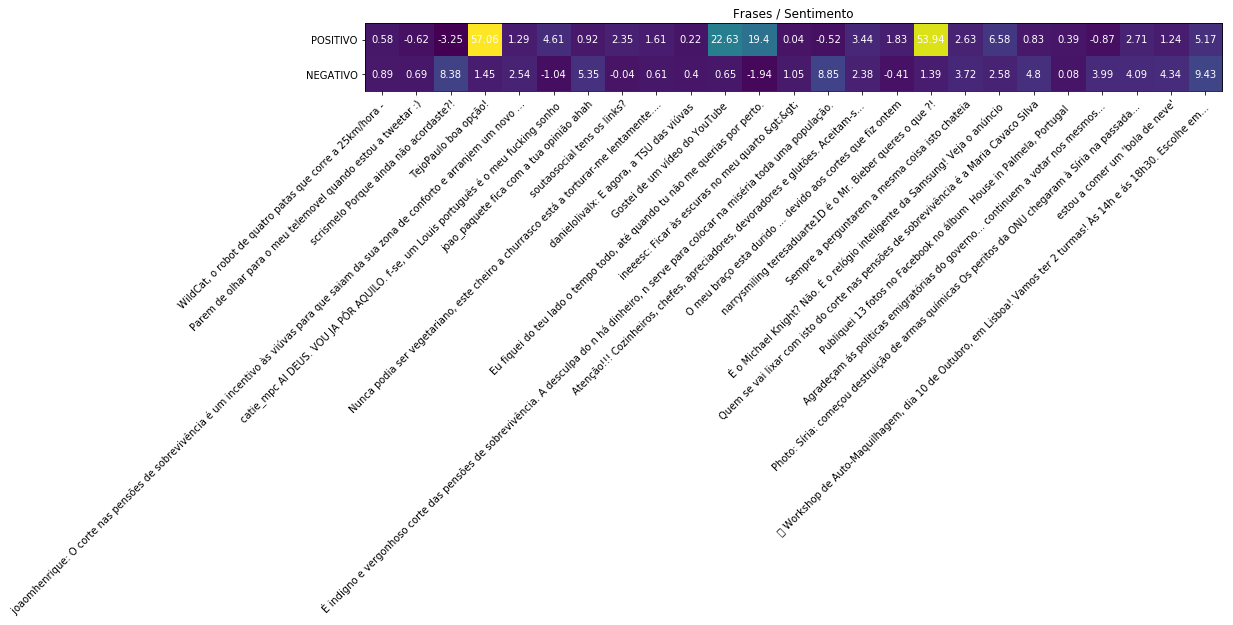

In [17]:
N = 25

categories = list(df)
k_phrases = original_tweets[:N] # [f'D{i}' for i in range(len(original_phrases[:N]))]
values = df[:N].values.T

fig, ax = plt.subplots(1, 1, figsize=(17, 17))
im = ax.imshow(values)

# We want to show all ticks...
ax.set_xticks(np.arange(len(k_phrases)))
ax.set_yticks(np.arange(len(categories)))
# ... and label them with the respective list entries
ax.set_xticklabels(k_phrases)
ax.set_yticklabels(categories)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for j in range(len(categories)):
    for i in range(len(k_phrases)):
        text = ax.text(i, j, values[j, i],
                       ha="center", va="center", color="w")

ax.set_title("Frases / Sentimento")
fig.tight_layout()
plt.show()

In [18]:
for i, frase in enumerate(original_tweets[:25]):
    print('-' * 20)
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    print(f'D{i} - {frase}')
    print(f'ORIGINAL : {sents[i].upper()}')
    print(f'CALCULADO : {calculado}')
    print(df.loc[f'D{i}'])

--------------------
D0 - WildCat, o robot de quatro patas que corre a 25km/hora - 
ORIGINAL : NEUTRAL
CALCULADO : NEGATIVO
POSITIVO    0.58
NEGATIVO    0.89
Name: D0, dtype: float64
--------------------
D1 - Parem de olhar para o meu telemovel quando estou a tweetar :)
ORIGINAL : POSITIVE
CALCULADO : NEGATIVO
POSITIVO   -0.62
NEGATIVO    0.69
Name: D1, dtype: float64
--------------------
D2 - scrismelo Porque ainda não acordaste?!
ORIGINAL : NEUTRAL
CALCULADO : NEGATIVO
POSITIVO   -3.25
NEGATIVO    8.38
Name: D2, dtype: float64
--------------------
D3 - TejoPaulo boa opção!
ORIGINAL : NEUTRAL
CALCULADO : POSITIVO
POSITIVO    57.06
NEGATIVO     1.45
Name: D3, dtype: float64
--------------------
D4 -  joaomhenrique: O corte nas pensões de sobrevivência é um incentivo às viúvas para que saiam da sua zona de conforto e arranjem um novo …
ORIGINAL : NEUTRAL
CALCULADO : NEGATIVO
POSITIVO    1.29
NEGATIVO    2.54
Name: D4, dtype: float64
--------------------
D5 - catie_mpc AI DEUS. VOU JA PÔ

### Validação 4

In [26]:
original_tweets = []
sents = []
filename = '/home/rdenadai/vagrant/python-dev/sentiment-analysis-2018-president-election/dataset/tweets_mg2.csv'
with open(filename, 'r') as h:
    reader = csv.reader(h, delimiter='|')
    for row in reader:
        tweet = row[2]
        tweet_sent = row[9]
        for o, r in rep:
            tweet = re.sub(o, r, tweet, flags=re.MULTILINE)
        if len(tweet) > 5:
            original_tweets += [tweet]
            sents += [tweet_sent]

print('Starting NLP clean up...')
tweets = generate_corpus(original_tweets[:2000])
ltweets = [f'D{i}' for i in range(len(tweets))]

Starting NLP clean up...


In [28]:
for inter_phrases in chunks(tweets, 500):
    inter_ltweets = [f'D{i}' for i in range(len(inter_phrases))]
    print('Starting EmotionalLSA model...')
    model = EmotionalLSA(debug=False)
    print('fit and transform...')
    predicted = model.fit_transform(inter_phrases, emotion_words_n)
    df = pd.DataFrame(predicted, index=inter_ltweets, columns=emotion_words_n.keys())
    
    accuracy = 0
    for i, frase in enumerate(inter_phrases):
        sentimento_original = sents[i].upper()
        calculado = df.loc[f'D{i}'].idxmax(axis=1)
        if sentimento_original == calculado:
            accuracy += 1
    accuracy = np.round((accuracy / len(inter_phrases)) * 100, 2)
    print(f'Accuracy: {accuracy}%')

Starting EmotionalLSA model...
fit and transform...
Accuracy: 3.2%
Starting EmotionalLSA model...
fit and transform...
Accuracy: 3.2%
Starting EmotionalLSA model...
fit and transform...
Accuracy: 3.2%
Starting EmotionalLSA model...
fit and transform...
Accuracy: 3.2%


In [21]:
print('Starting EmotionalLSA model...')
model = EmotionalLSA(debug=True)
print('fit and transform...')
predicted = model.fit_transform(tweets, emotion_words_n)

Starting EmotionalLSA model...
fit and transform...
using Count...
Actual number of features: 2276
--- 0.020502090454101562 seconds ---
Calculating SVD...
--- 1.4768617153167725 seconds ---
Processing emotional state... this may take a while...
--- 0.0005443096160888672 seconds ---
Generating emotional state from lexicon...
--- 0.20507097244262695 seconds ---
Calculating final emotional matrix...
--- 0.3612542152404785 seconds ---


In [22]:
df = pd.DataFrame(predicted, index=ltweets, columns=emotion_words_n.keys())

In [23]:
accuracy = 0
for i, frase in enumerate(tweets):
    sentimento_original = sents[i].upper()
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    if sentimento_original == calculado:
        accuracy += 1
accuracy = np.round((accuracy / len(tweets)) * 100, 2)
print(f'Accuracy: {accuracy}%')

Accuracy: 2.2%


In [24]:
for i, frase in enumerate(original_tweets[:25]):
    print('-' * 20)
    calculado = df.loc[f'D{i}'].idxmax(axis=1)
    print(f'D{i} - {frase}')
    print(f'ORIGINAL : {sents[i].upper()}')
    print(f'CALCULADO : {calculado}')
    print(df.loc[f'D{i}'])

--------------------
D0 - ���⛪  Catedral de Santo Antônio - Governador Valadares/MG 
ORIGINAL : NEUTRO
CALCULADO : POSITIVO
POSITIVO    0.0
NEGATIVO    0.0
Name: D0, dtype: float64
--------------------
D1 - �  Governador Valadares, Minas Gerais 
ORIGINAL : NEUTRO
CALCULADO : POSITIVO
POSITIVO    0.0
NEGATIVO    0.0
Name: D1, dtype: float64
--------------------
D2 - ��  Governador Valadares, Minas Gerais 
ORIGINAL : NEUTRO
CALCULADO : POSITIVO
POSITIVO    0.0
NEGATIVO    0.0
Name: D2, dtype: float64
--------------------
D3 - ��� PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas 
ORIGINAL : NEGATIVO
CALCULADO : POSITIVO
POSITIVO    0.0
NEGATIVO    0.0
Name: D3, dtype: float64
--------------------
D4 -  bom é bandido morto. Deputado Cabo Júlio é condenado e fica inelegível por 10 anos - Politica - Estado de Minas 
ORIGINAL : NEUTRO
CALCULADO : POSITIVO
POSITIVO    0.0
NEGATIVO    0.0
Name: D4, dtype: float64
--------------------
D5 - ..E 25